# Modeling

In [19]:
import gzip
import pickle
import random
import numpy as np
import matplotlib.pyplot as plt
from utils.signal_processing import *
%matplotlib inline
plt.style.use('ggplot')

DATA_PATH = '/root/Workspace/DataWarehouse/stMary_RRpo'

In [20]:
with gzip.open(f'{DATA_PATH}/21_230518_resamp_sliced125_filt_patient_stmary.pickle.gzip', 'rb') as f:
    dataset = pickle.load(f)

print(len(dataset), len(dataset[0][0]))

random.seed(42)
random.shuffle(dataset)

pleths = []
resps = []
for ppg, rr in dataset:
    pleths.append(ppg.astype(np.float64))
    resps.append(rr)

pleths = np.asarray(pleths)
resps = np.asarray(resps)
print(pleths.shape, resps.shape)

6508 1800
(6508, 1800) (6508,)


## Normalization

In [21]:
from sklearn.model_selection import KFold
from sklearn.preprocessing import MinMaxScaler

In [22]:
scaler = MinMaxScaler()
scaled_pleths = np.asarray([scaler.fit_transform(pleth.reshape(-1,1)) for pleth in pleths])
print(scaled_pleths.shape, type(scaled_pleths[0][0][0]))

ratio_tr = 0.8
train_x, train_y = scaled_pleths[:int(len(scaled_pleths)*ratio_tr)], resps[:int(len(resps)*ratio_tr)]
val_x, val_y = scaled_pleths[int(len(scaled_pleths)*ratio_tr):], resps[int(len(resps)*ratio_tr):]
print(train_x.shape, train_y.shape)
print(val_x.shape, val_y.shape)

(6508, 1800, 1) <class 'numpy.float64'>
(5206, 1800, 1) (5206,)
(1302, 1800, 1) (1302,)


In [27]:
test = signal_resample(train_x[0], 30, 15)
test2 = signal_resample(test, 15, 15/2)
test3 = signal_resample(test2, 15/2, 15/2/2)
test.shape, test2.shape, test3.shape

((900, 1), (450, 1), (225, 1))

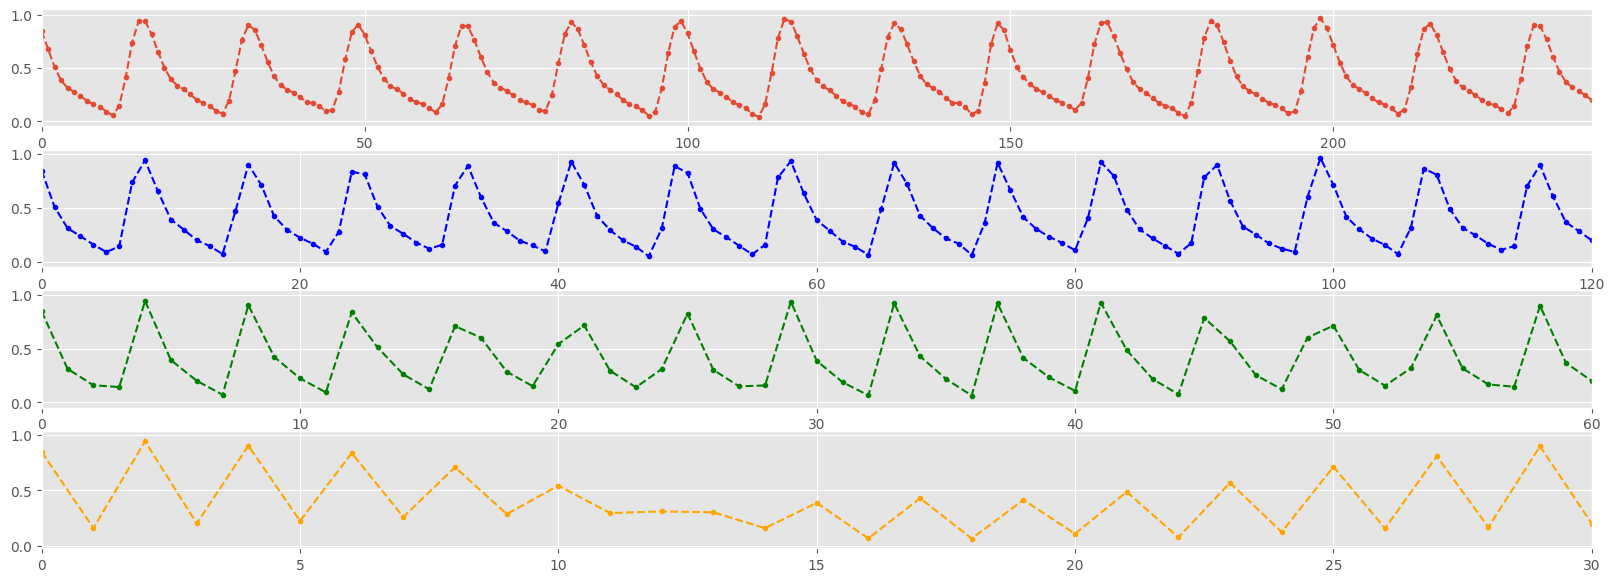

In [32]:
fig, axs = plt.subplots(4,1,figsize=(20,7))
axs[0].plot(train_x[0], linestyle='--', marker='o', markersize=3)
axs[0].set_xlim(0,30*8)
axs[1].plot(test, linestyle='--', marker='o', markersize=3, c='b')
axs[1].set_xlim(0,15*8)
axs[2].plot(test2, linestyle='--', marker='o', markersize=3, c='g')
axs[2].set_xlim(0,15/2*8)
axs[3].plot(test3, linestyle='--', marker='o', markersize=3, c='orange')
axs[3].set_xlim(0,15/4*8)
plt.show()

## Architecture: Unet

- Unet 모델 구조를 이용한다.
- Level을 너무 깊게 파지 말고 천천히 만들어보자.

In [2]:
import os
import keras
import tensorflow as tf
from keras.models import Model
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from keras.layers import Conv1D, MaxPooling1D, AveragePooling1D, Dense, BatchNormalization, Activation, Add, Flatten, Dropout
print(f'Is GPU Avaliable: {tf.config.list_physical_devices("GPU")}')
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

2023-05-23 15:28:49.771229: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-05-23 15:28:49.816448: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-23 15:28:50.556350: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


Is GPU Avaliable: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [3]:
class ContractionBlock(Model):
    def __init__(self, *args, **kwargs):
        super(ContractionBlock, self).__init__(*args, **kwargs)
        

    
    def call(self, inputs, training=None, mask=None):
        return super().call(inputs, training, mask)

In [4]:
class BottleNeckBlock(Model):
    def __init__(self, *args, **kwargs):
        super(BottleNeckBlock, self).__init__(*args, **kwargs)


    def call(self, inputs, training=None, mask=None):
        return super().call(inputs, training, mask)

In [5]:
class ExpansionBlock(Model):
    def __init__(self, *args, **kwargs):
        super(ExpansionBlock, self).__init__(*args, **kwargs)

    
    def call(self, inputs, training=None, mask=None):
        return super().call(inputs, training, mask)

In [6]:
class Unet(Model):
    def __init__(self, *args, **kwargs):
        super(Unet, self).__init__(*args, **kwargs)


    def call(self, inputs, training=None, mask=None):
        return super().call(inputs, training, mask)
    

    def train_step(self, data):
        return super().train_step(data)
    

    def test_step(self, data):
        return super().test_step(data)